In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from scipy.stats import pearsonr
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


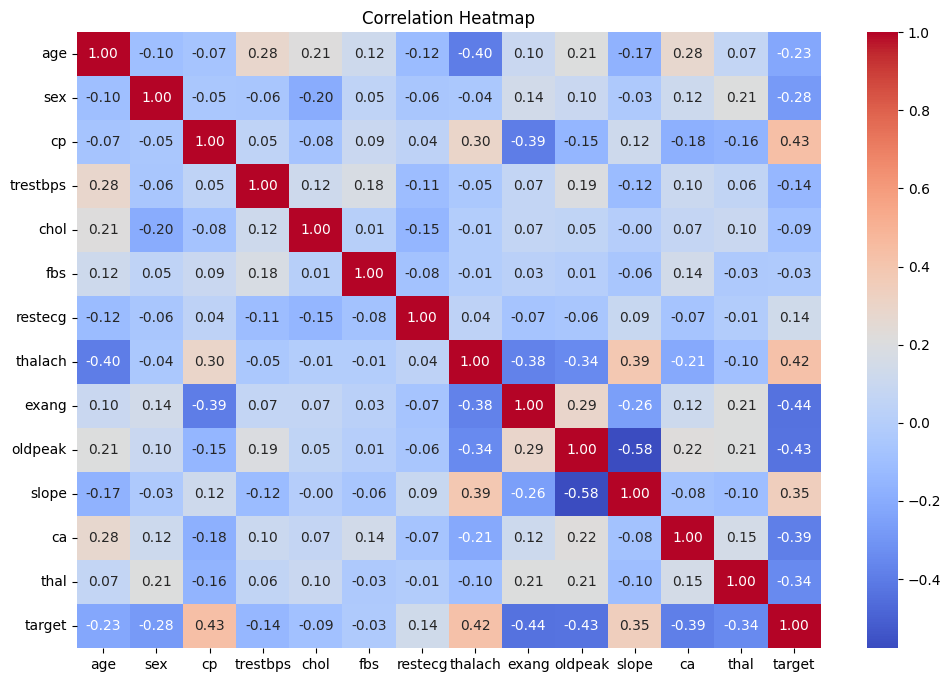

In [ ]:
correlation_matrix=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot= True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1000x800 with 0 Axes>

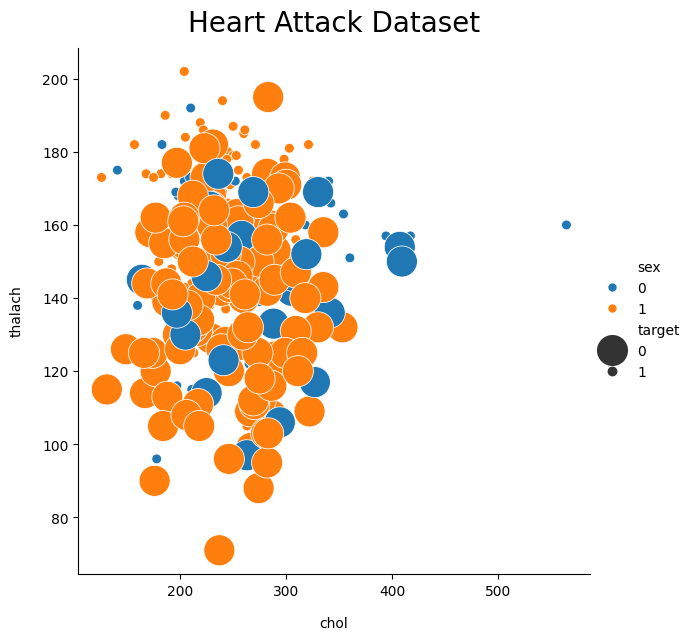

In [ ]:
plt.figure(figsize=(10, 8))
sns.relplot(x='chol', y='thalach', hue='sex', size='target', sizes=(50, 500), height=6, data=df)
plt.title("Heart Attack Dataset", y=1.015, fontsize=20)
plt.xlabel("chol", labelpad=13)
plt.ylabel("thalach", labelpad=13)
ax = plt.gca()

<Axes: xlabel='sex', ylabel='count'>

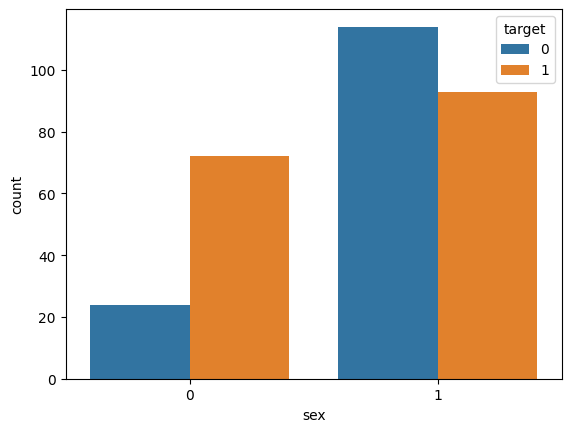

In [ ]:
sns.countplot(x="sex", hue="target", data=df)

<Axes: xlabel='cp', ylabel='count'>

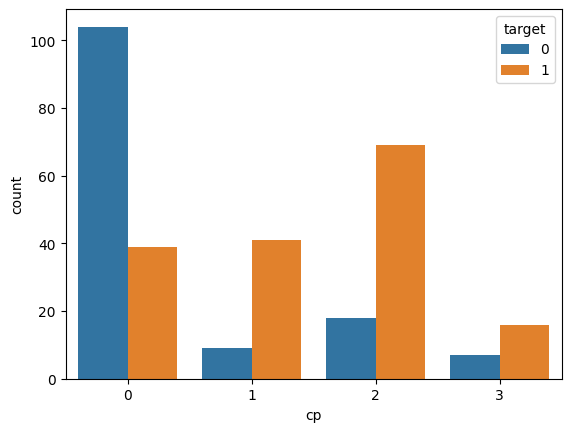

In [ ]:
sns.countplot(x="cp", hue="target", data=df)

<Axes: xlabel='fbs', ylabel='count'>

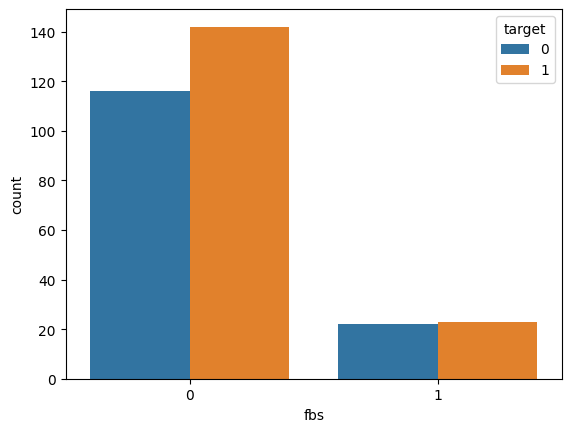

In [ ]:
sns.countplot(x="fbs", hue="target", data=df)

In [ ]:
X= df.drop("target",axis=1)

y=df["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.3
)

**Feature Seleciton**

In [ ]:
# Initializeing The Feature Logistic and Gradient Boosting
logreg_selector = SelectFromModel(LogisticRegression(max_iter=1000))
gb_selector = SelectFromModel(GradientBoostingClassifier(n_estimators=100, random_state=42))

logreg_selector.fit(X_train, y_train)
gb_selector.fit(X_train, y_train)
#Geting Selected Features From Each Model
selected_features_logreg = X.columns[logreg_selector.get_support()]
selected_features_gb = X.columns[gb_selector.get_support()]

selected_features_hybrid = np.union1d(selected_features_logreg, selected_features_gb)

print(selected_features_hybrid)

['ca' 'chol' 'cp' 'exang' 'oldpeak' 'restecg' 'sex' 'thal']


In [ ]:
#selected features
X_train_new = X_train[selected_features_hybrid]
X_test_new = X_test[selected_features_hybrid]

**ANN**

In [ ]:
#Defining The Model
model = Sequential()
#Hidden Layers
model.add(Dense(64, input_dim=X_train_new.shape[1], activation= 'relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #Output Layer

# Model Compilation
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
# Training The Model
model.fit(X_train_new, y_train, epochs=50, batch_size=32)
#Evaluating The Model
loss, accuracy = model.evaluate(X_test_new,y_test)
print(f'Accuracy:{accuracy*100}%')

Epoch 1/50
7/7 [==============================] - 2s 6ms/step - loss: 12.3605 - accuracy: 0.4340
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 1.4265 - accuracy: 0.5519
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 1.5184 - accuracy: 0.5660
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 1.1778 - accuracy: 0.4292
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 0.8246 - accuracy: 0.5189
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 0.8542 - accuracy: 0.5566
Epoch 7/50
7/7 [==============================] - 0s 6ms/step - loss: 0.7591 - accuracy: 0.4528
Epoch 8/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6826 - accuracy: 0.5660
Epoch 9/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6790 - accuracy: 0.5991
Epoch 10/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6663 - accuracy: 0.6274
Epoch 11/50
7/7 [=====================